In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [12]:
vid = np.load("./data/0b599d0670fcbafcaa8ed5567c0f4b10b959e6e49eed157be700bc62cffd1876.npy")

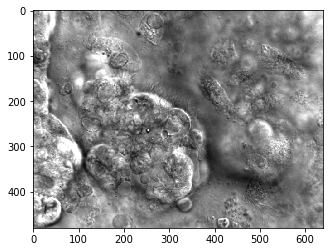

In [3]:
plt.imshow(vid[0], cmap = "gray")

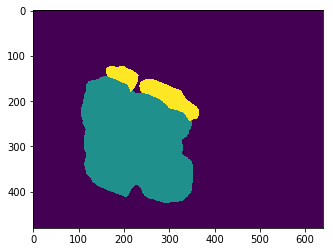

In [4]:
mask = imageio.imread("data/project2_masks_0b599d0670fcbafcaa8ed5567c0f4b10b959e6e49eed157be700bc62cffd1876.png")
plt.imshow(mask)

In [5]:
vid = np.swapaxes(vid, 0, 2)
vid = np.swapaxes(vid, 0, 1)
n_pixels = vid.shape[0] * vid.shape[1]
n_frames = vid.shape[2]
matrix = vid.reshape((n_pixels, n_frames))

In [6]:
matrix.shape

(307200, 100)

In [10]:
variances = np.var(matrix, axis=1)

In [11]:
vid.shape

(480, 640, 100)

In [13]:
vid.shape

(100, 480, 640)

In [16]:
var_im = variances.reshape((480,640))

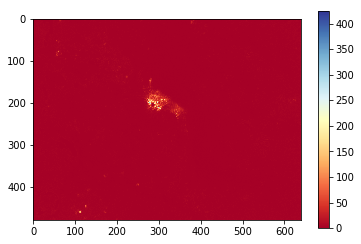

In [31]:
plt.imshow(var_im, cmap= 'RdYlBu')
plt.colorbar()

In [36]:
mask = np.zeros((480,640))

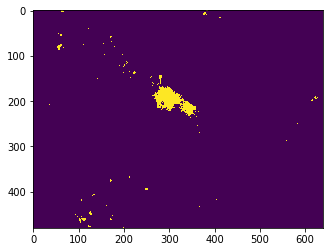

In [39]:
mask[var_im > 10] = 1
plt.imshow(mask)

In [54]:
vid2 = np.load("./data/4f421f6a3b7aa1903d6267a4a1948a3f5fb5692da012754d9d1f4caf7c0e7de5.npy")

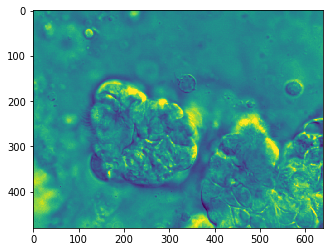

In [55]:
plt.imshow(vid2[0])

In [56]:
vid2 = np.swapaxes(vid2, 0, 2)
vid2 = np.swapaxes(vid2, 0, 1)
n_pixels = vid2.shape[0] * vid2.shape[1]
n_frames = vid2.shape[2]
matrix = vid2.reshape((n_pixels, n_frames))

In [57]:
variances = np.var(matrix, axis=1)
var_im = variances.reshape((vid2.shape[0],vid2.shape[1]))

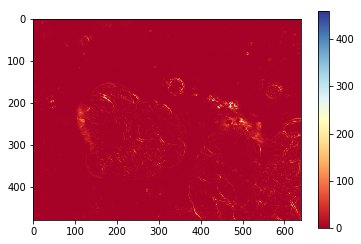

In [58]:
plt.imshow(var_im, cmap= 'RdYlBu')
plt.colorbar()

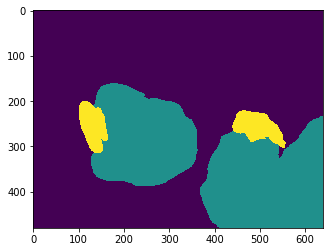

In [59]:
mask = imageio.imread("data/project2_masks_4f421f6a3b7aa1903d6267a4a1948a3f5fb5692da012754d9d1f4caf7c0e7de5.png")
plt.imshow(mask)